## Results from Section 6.7

Slopes using distributed method. 

Model1 - 35 bins; Model2 - 15 bins; Model3 - 55 bins.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from astropy.io import fits

## JAM models

In [2]:
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)
TPL_slope1  = np.empty([Nsubhalos]) # "True" PL_slope1
TAV_slope1  = np.empty([Nsubhalos]) # "True" AV_slope1
TPL_slope2  = np.empty([Nsubhalos]) # "True" PL_slope2
TAV_slope2  = np.empty([Nsubhalos]) # "True" AV_slope2

MPL_slope1_model1  = np.empty([Nsubhalos]) # model PL_slope1
MAV_slope1_model1  = np.empty([Nsubhalos]) # model AV_slope1
MPL_slope2_model1  = np.empty([Nsubhalos]) # model PL_slope2
MAV_slope2_model1  = np.empty([Nsubhalos]) # model AV_slope2

MPL_slope1_model2  = np.empty([Nsubhalos]) # model PL_slope1
MAV_slope1_model2  = np.empty([Nsubhalos]) # model AV_slope1
MPL_slope2_model2  = np.empty([Nsubhalos]) # model PL_slope2
MAV_slope2_model2  = np.empty([Nsubhalos]) # model AV_slope2

MPL_slope1_model3  = np.empty([Nsubhalos]) # model PL_slope1
MAV_slope1_model3  = np.empty([Nsubhalos]) # model AV_slope1
MPL_slope2_model3  = np.empty([Nsubhalos]) # model PL_slope2
MAV_slope2_model3  = np.empty([Nsubhalos]) # model AV_slope2



for i, s in enumerate(subhalos):
    with open("./{}/model1/normal/JAM/Analysis_2.5Reff/quantities.json".format(s)) as f:
        model1 = json.load(f)
        f.close()
        
    with open("./{}/model2/normal/JAM/Analysis_2.5Reff/quantities.json".format(s)) as f:
        model2 = json.load(f)
        f.close()
        
    with open("./{}/model3/normal/JAM/Analysis_2.5Reff/quantities.json".format(s)) as f:
        model3 = json.load(f)
        f.close()
        
    # True data
    log_img = fits.open("/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/TNG50-1-snap84-subhalo{}/imgs/log_img.fits".format(s))
    
    TPL_slope1[i] = -log_img[1].data["PL_slope1"] 
    TAV_slope1[i] = log_img[1].data["AV_slope1"] 
    TPL_slope2[i] = -log_img[1].data["PL_slope2"] 
    TAV_slope2[i] = log_img[1].data["AV_slope2"]
    ############################################
        #Models
        
    #Model1
    MPL_slope1_model1[i]  = -model1["PL_slope1"]
    MAV_slope1_model1[i]  = model1["AV_slope1"]
    MPL_slope2_model1[i]  = -model1["PL_slope2"]
    MAV_slope2_model1[i]  = model1["AV_slope2"]
    
    #Model2
    MPL_slope1_model2[i]  = -model2["PL_slope1"]
    MAV_slope1_model2[i]  = model2["AV_slope1"]
    MPL_slope2_model2[i]  = -model2["PL_slope2"]
    MAV_slope2_model2[i]  = model2["AV_slope2"]
    
    #Model3
    MPL_slope1_model3[i]  = -model3["PL_slope1"]
    MAV_slope1_model3[i]  = model3["AV_slope1"]
    MPL_slope2_model3[i]  = -model3["PL_slope2"]
    MAV_slope2_model3[i]  = model3["AV_slope2"]
    
    

In [2]:
def median_hi_lo(dataset):
    # Return the median, hi and low percentiles
    p = np.percentile(dataset, [16, 50, 84])
    median = p[1]
    hi, lo = np.diff(p)
    
    return median, hi, lo

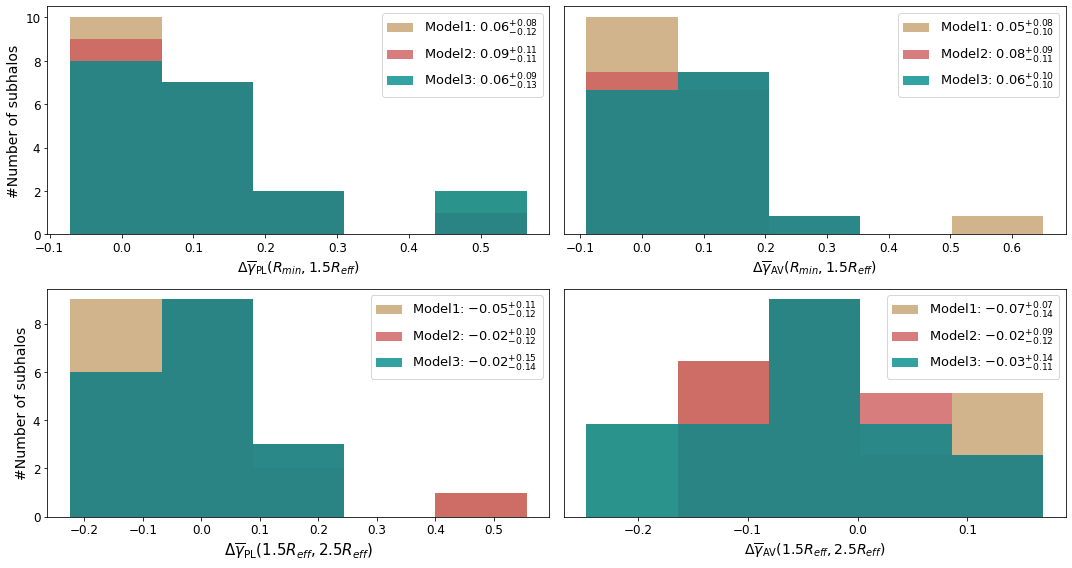

In [4]:
plt.figure(figsize=(15,8))


plt.subplot(221) # PL slope 1
    # Model1
diff1 = (MPL_slope1_model1 - TPL_slope1)/TPL_slope1
m, hi, lo = median_hi_lo( diff1 )
_, bins, _ = plt.hist(diff1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))
    

    # Model2
diff2 = (MPL_slope1_model2 - TPL_slope1)/TPL_slope1
m, hi, lo = median_hi_lo( diff2 )
_ = plt.hist(diff2, bins=bins, density=False, alpha=0.8, color="indianred",
             label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model3
diff3 = (MPL_slope1_model3 - TPL_slope1)/TPL_slope1
m, hi, lo = median_hi_lo( diff3 )
_ = plt.hist(diff3, bins=bins, density=False, alpha=0.8, color="darkcyan",
             label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=13)
plt.ylabel("#Number of subhalos", size=14)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm PL}(R_{min},1.5R_{eff})$", size=14)
plt.xticks(size=12)
plt.yticks(size=12)


plt.subplot(222) # AV slope 1
       # Model1
diff1 = (MAV_slope1_model1 - TAV_slope1)/TAV_slope1
m, hi, lo = median_hi_lo( diff1 )
_, bins, _ = plt.hist(diff1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model2
diff2 = (MAV_slope1_model2 - TAV_slope1)/TAV_slope1
m, hi, lo = median_hi_lo( diff2 )
_ = plt.hist(diff2, bins=bins, density=False, alpha=0.8, color="indianred",
             label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model2
diff3 = (MAV_slope1_model3 - TAV_slope1)/TAV_slope1
m, hi, lo = median_hi_lo( diff3 )
_ = plt.hist(diff3, bins=bins, density=False, alpha=0.8, color="darkcyan",
             label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=13)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm AV}(R_{min},1.5R_{eff})$", size=14)
plt.xticks(size=12)
plt.yticks([])

plt.subplot(223) # PL slope 2
    # Model1
diff1 = (MPL_slope2_model1 - TPL_slope2)/TPL_slope2
m, hi, lo = median_hi_lo( diff1 )
_, bins, _ = plt.hist(diff1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model2
diff2 = (MPL_slope2_model2 - TPL_slope2)/TPL_slope2
m, hi, lo = median_hi_lo( diff2 )
_ = plt.hist(diff2, bins=bins, density=False, alpha=0.8, color="indianred",
             label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model3
diff3 = (MPL_slope2_model3 - TPL_slope2)/TPL_slope2
m, hi, lo = median_hi_lo( diff3 )
_ = plt.hist(diff3, bins=bins, density=False, alpha=0.8, color="darkcyan",
             label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=13)
plt.ylabel("#Number of subhalos", size=14)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm PL}(1.5R_{eff},2.5R_{eff})$", size=15)

plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(224) # AV slope 2
       # Model1
diff1 = (MAV_slope2_model1 - TAV_slope2)/TAV_slope2
m, hi, lo = median_hi_lo( diff1 )
_, bins, _ = plt.hist(diff1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model2
diff2 = (MAV_slope2_model2 - TAV_slope2)/TAV_slope2
m, hi, lo = median_hi_lo( diff2 )
_ = plt.hist(diff2, bins=bins, density=False, alpha=0.8, color="indianred",
             label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model3
diff3 = (MAV_slope2_model3 - TAV_slope2)/TAV_slope2
m, hi, lo = median_hi_lo( diff3 )
_ = plt.hist(diff3, bins=bins, density=False, alpha=0.8, color="darkcyan",
             label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=13)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm AV}(1.5R_{eff},2.5R_{eff})$", size=14)
plt.xticks(size=12)
plt.yticks([])



plt.tight_layout()

----

## dyLens models

In [3]:
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)
TPL_slope1  = np.empty([Nsubhalos]) # "True" PL_slope1
TAV_slope1  = np.empty([Nsubhalos]) # "True" AV_slope1
TPL_slope2  = np.empty([Nsubhalos]) # "True" PL_slope2
TAV_slope2  = np.empty([Nsubhalos]) # "True" AV_slope2

MPL_slope1_model1  = np.empty([Nsubhalos]) # model PL_slope1
MAV_slope1_model1  = np.empty([Nsubhalos]) # model AV_slope1
MPL_slope2_model1  = np.empty([Nsubhalos]) # model PL_slope2
MAV_slope2_model1  = np.empty([Nsubhalos]) # model AV_slope2

MPL_slope1_model2  = np.empty([Nsubhalos]) # model PL_slope1
MAV_slope1_model2  = np.empty([Nsubhalos]) # model AV_slope1
MPL_slope2_model2  = np.empty([Nsubhalos]) # model PL_slope2
MAV_slope2_model2  = np.empty([Nsubhalos]) # model AV_slope2

MPL_slope1_model3  = np.empty([Nsubhalos]) # model PL_slope1
MAV_slope1_model3  = np.empty([Nsubhalos]) # model AV_slope1
MPL_slope2_model3  = np.empty([Nsubhalos]) # model PL_slope2
MAV_slope2_model3  = np.empty([Nsubhalos]) # model AV_slope2



for i, s in enumerate(subhalos):
    with open("./{}/model1/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(s)) as f:
        model1 = json.load(f)
        f.close()
        
    with open("./{}/model2/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(s)) as f:
        model2 = json.load(f)
        f.close()
        
    with open("./{}/model3/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(s)) as f:
        model3 = json.load(f)
        f.close()
        
    # True data
    log_img = fits.open("/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/TNG50-1-snap84-subhalo{}/imgs/log_img.fits".format(s))
    
    TPL_slope1[i] = -log_img[1].data["PL_slope1"] 
    TAV_slope1[i] = log_img[1].data["AV_slope1"] 
    TPL_slope2[i] = -log_img[1].data["PL_slope2"] 
    TAV_slope2[i] = log_img[1].data["AV_slope2"]
    ############################################
        #Models
        
    #Model1
    MPL_slope1_model1[i]  = -model1["PL_slope1"]
    MAV_slope1_model1[i]  = model1["AV_slope1"]
    MPL_slope2_model1[i]  = -model1["PL_slope2"]
    MAV_slope2_model1[i]  = model1["AV_slope2"]
    
    #Model2
    MPL_slope1_model2[i]  = -model2["PL_slope1"]
    MAV_slope1_model2[i]  = model2["AV_slope1"]
    MPL_slope2_model2[i]  = -model2["PL_slope2"]
    MAV_slope2_model2[i]  = model2["AV_slope2"]
    
    #Model3
    MPL_slope1_model3[i]  = -model3["PL_slope1"]
    MAV_slope1_model3[i]  = model3["AV_slope1"]
    MPL_slope2_model3[i]  = -model3["PL_slope2"]
    MAV_slope2_model3[i]  = model3["AV_slope2"]
    
    

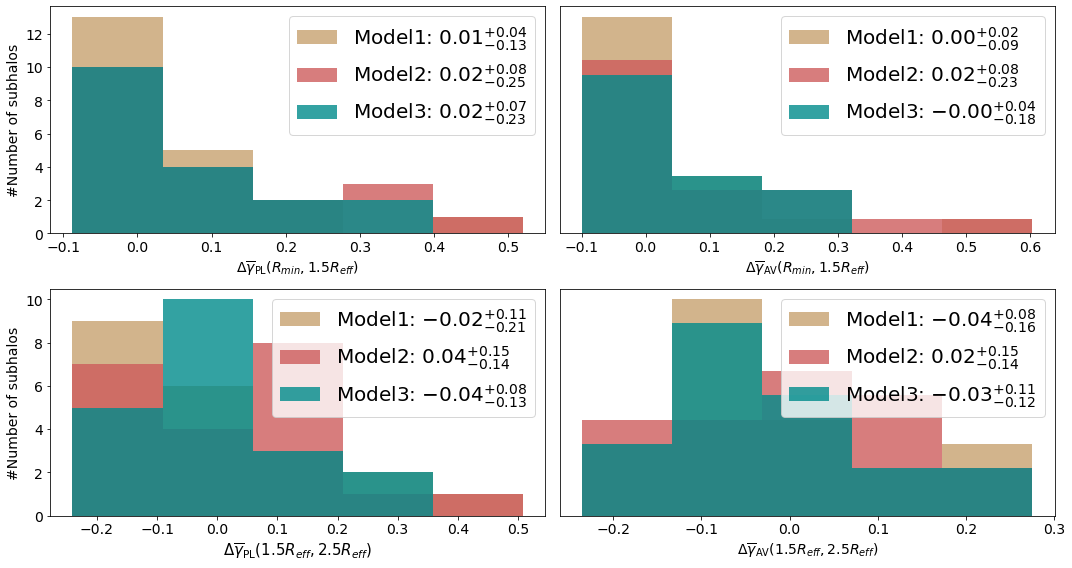

In [4]:
plt.figure(figsize=(15,8))


plt.subplot(221) # PL slope 1
    # Model1
diff1 = (MPL_slope1_model1 - TPL_slope1)/TPL_slope1
m, hi, lo = median_hi_lo( diff1 )
_, bins, _ = plt.hist(diff1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))
    

    # Model2
diff2 = (MPL_slope1_model2 - TPL_slope1)/TPL_slope1
m, hi, lo = median_hi_lo( diff2 )
_ = plt.hist(diff2, bins=bins, density=False, alpha=0.8, color="indianred",
             label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model3
diff3 = (MPL_slope1_model3 - TPL_slope1)/TPL_slope1
m, hi, lo = median_hi_lo( diff3 )
_ = plt.hist(diff3, bins=bins, density=False, alpha=0.8, color="darkcyan",
             label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=20)
plt.ylabel("#Number of subhalos", size=14)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm PL}(R_{min},1.5R_{eff})$", size=14)
plt.xticks(size=14)
plt.yticks(size=14)


plt.subplot(222) # AV slope 1
       # Model1
diff1 = (MAV_slope1_model1 - TAV_slope1)/TAV_slope1
m, hi, lo = median_hi_lo( diff1 )
_, bins, _ = plt.hist(diff1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model2
diff2 = (MAV_slope1_model2 - TAV_slope1)/TAV_slope1
m, hi, lo = median_hi_lo( diff2 )
_ = plt.hist(diff2, bins=bins, density=False, alpha=0.8, color="indianred",
             label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model2
diff3 = (MAV_slope1_model3 - TAV_slope1)/TAV_slope1
m, hi, lo = median_hi_lo( diff3 )
_ = plt.hist(diff3, bins=bins, density=False, alpha=0.8, color="darkcyan",
             label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=20)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm AV}(R_{min},1.5R_{eff})$", size=14)
plt.xticks(size=14)
plt.yticks([])

plt.subplot(223) # PL slope 2
    # Model1
diff1 = (MPL_slope2_model1 - TPL_slope2)/TPL_slope2
m, hi, lo = median_hi_lo( diff1 )
_, bins, _ = plt.hist(diff1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model2
diff2 = (MPL_slope2_model2 - TPL_slope2)/TPL_slope2
m, hi, lo = median_hi_lo( diff2 )
_ = plt.hist(diff2, bins=bins, density=False, alpha=0.8, color="indianred",
             label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model3
diff3 = (MPL_slope2_model3 - TPL_slope2)/TPL_slope2
m, hi, lo = median_hi_lo( diff3 )
_ = plt.hist(diff3, bins=bins, density=False, alpha=0.8, color="darkcyan",
             label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=20)
plt.ylabel("#Number of subhalos", size=14)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm PL}(1.5R_{eff},2.5R_{eff})$", size=15)

plt.xticks(size=14)
plt.yticks(size=14)

plt.subplot(224) # AV slope 2
       # Model1
diff1 = (MAV_slope2_model1 - TAV_slope2)/TAV_slope2
m, hi, lo = median_hi_lo( diff1 )
_, bins, _ = plt.hist(diff1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model2
diff2 = (MAV_slope2_model2 - TAV_slope2)/TAV_slope2
m, hi, lo = median_hi_lo( diff2 )
_ = plt.hist(diff2, bins=bins, density=False, alpha=0.8, color="indianred",
             label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    # Model3
diff3 = (MAV_slope2_model3 - TAV_slope2)/TAV_slope2
m, hi, lo = median_hi_lo( diff3 )
_ = plt.hist(diff3, bins=bins, density=False, alpha=0.8, color="darkcyan",
             label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

plt.legend(fontsize=20)
plt.xlabel(r"$\Delta \overline{\gamma}_{\rm AV}(1.5R_{eff},2.5R_{eff})$", size=14)
plt.xticks(size=14)
plt.yticks([])



plt.tight_layout()
plt.savefig('/home/carlosmelo/Desktop/plots/slopes_dyLens_kin.png', dpi=600,  bbox_inches='tight') 

---